In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
dataset = pd_dat.values
pd_dat.head()

,0,1,2,3,4,5,6,7
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)
X_train.shape,Y_train.shape

((80, 6), (80, 2))

In [5]:
np.transpose(X_train).shape

(6, 80)

In [6]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [7]:
temp_train.shape

(80,)

#### Build the model

In [8]:
# Build the input layers

from tensorflow.keras import Input,layers
shape_input = [1,]
temperature = Input(shape=shape_input,name="temp")
nausea_occurence = Input(shape=shape_input,name="nocc")
lumbar_pain = Input(shape=shape_input,name="lumbp")
urine_pushing = Input(shape=shape_input,name="up")
micturition_pains = Input(shape=shape_input,name="mict")
bis = Input(shape=shape_input,name="bis")

In [9]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [10]:
# Merge all input features into a single large vector
x = layers.concatenate(list_inputs)


In [11]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(units = 1,activation = "sigmoid",name="inflan")(x) 
nephritis_pred =layers.Dense(units= 1,activation = "sigmoid",name="nephr")(x)


In [12]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [13]:
# Create the model object
from tensorflow.keras import Model
model = Model(inputs = list_inputs,outputs=list_outputs)



In [14]:
from sklearn.utils import compute_class_weight
keys = np.unique(inflam_train)
values = compute_class_weight("balanced", keys, inflam_train)
cwinflam = dict(zip(keys, values))

keys = np.unique(nephr_train)
values = compute_class_weight("balanced", keys, nephr_train)
cwnephr = dict(zip(keys, values))



#### Plot the model

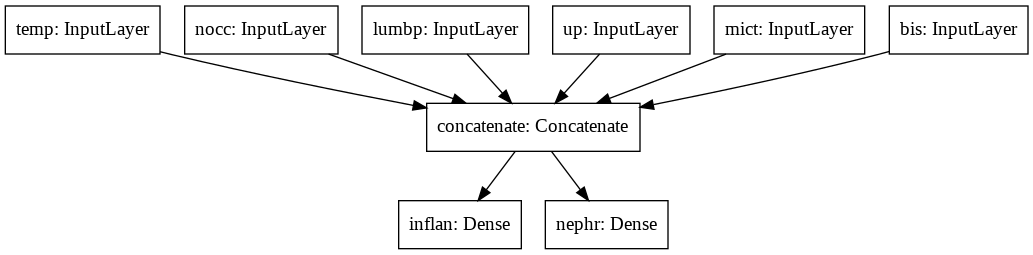

In [15]:
# Display the multiple input/output model
from tensorflow.keras.utils import plot_model
plot_model(model,"modelarhcitect.png")

#### Compile the model

In [16]:
# Compile the model
METRICSinflan =[tf.keras.metrics.BinaryAccuracy(name="ACCinflan")]
METRICSnephr = [tf.keras.metrics.BinaryAccuracy(name="ACCnephr")]
model.compile(loss= {"inflan":tf.keras.losses.BinaryCrossentropy(), "nephr" :tf.keras.losses.BinaryCrossentropy()},
             optimizer= tf.keras.optimizers.Adam(0.01),
             loss_weights={"inflan" : 0.8,"nephr":0.9},
             metrics={"inflan" : METRICSinflan,
                     "nephr":METRICSnephr})

#### Fit the model 

In [17]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflan': inflam_train, 'nephr': nephr_train}

In [18]:
# Train the model

history = model.fit(inputs_train,outputs_train,
         epochs =1000,
         class_weight=[cwinflam,cwnephr],
         batch_size = 100,validation_split=0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/1000
64/64 [==============================] - 2s 38ms/sample - loss: 26.0288 - inflan_loss: 14.7338 - nephr_loss: 15.8242 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.9303 - val_inflan_loss: 17.4261 - val_nephr_loss: 15.5439 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 2/1000
64/64 [==============================] - 0s 202us/sample - loss: 25.6864 - inflan_loss: 14.5316 - nephr_loss: 15.6235 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.5509 - val_inflan_loss: 17.1799 - val_nephr_loss: 15.3411 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 3/1000
64/64 [==============================] - 0s 1ms/sample - loss: 25.3441 - inflan_loss: 14.3294 - nephr_loss: 15.4228 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 27.1715 - val_inflan_loss: 16.9337 - val_nephr_loss: 15.1383 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 4/100

Epoch 27/1000
64/64 [==============================] - 0s 1ms/sample - loss: 17.1276 - inflan_loss: 9.4764 - nephr_loss: 10.6072 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 18.0651 - val_inflan_loss: 11.0258 - val_nephr_loss: 10.2716 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 28/1000
64/64 [==============================] - 0s 2ms/sample - loss: 16.7852 - inflan_loss: 9.2742 - nephr_loss: 10.4065 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 17.6857 - val_inflan_loss: 10.7797 - val_nephr_loss: 10.0689 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 29/1000
64/64 [==============================] - 0s 1ms/sample - loss: 16.4428 - inflan_loss: 9.0719 - nephr_loss: 10.2059 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 17.3063 - val_inflan_loss: 10.5335 - val_nephr_loss: 9.8661 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 30/1000
64/64 [==============================] - 0s 1

Epoch 54/1000
64/64 [==============================] - 0s 2ms/sample - loss: 7.8842 - inflan_loss: 4.0169 - nephr_loss: 5.1896 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 7.8210 - val_inflan_loss: 4.3799 - val_nephr_loss: 4.7967 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 55/1000
64/64 [==============================] - 0s 191us/sample - loss: 7.5419 - inflan_loss: 3.8148 - nephr_loss: 4.9890 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 7.4418 - val_inflan_loss: 4.1340 - val_nephr_loss: 4.5939 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 56/1000
64/64 [==============================] - 0s 189us/sample - loss: 7.1997 - inflan_loss: 3.6128 - nephr_loss: 4.7883 - inflan_ACCinflan: 0.4844 - nephr_ACCnephr: 0.4375 - val_loss: 7.0627 - val_inflan_loss: 3.8882 - val_nephr_loss: 4.3912 - val_inflan_ACCinflan: 0.3750 - val_nephr_ACCnephr: 0.4375
Epoch 57/1000
64/64 [==============================] - 0s 2ms/sample 

Epoch 81/1000
64/64 [==============================] - 0s 1ms/sample - loss: 1.0991 - inflan_loss: 0.5023 - nephr_loss: 0.7748 - inflan_ACCinflan: 0.6250 - nephr_ACCnephr: 0.3750 - val_loss: 0.8684 - val_inflan_loss: 0.4686 - val_nephr_loss: 0.5483 - val_inflan_ACCinflan: 0.6875 - val_nephr_ACCnephr: 0.7500
Epoch 82/1000
64/64 [==============================] - 0s 201us/sample - loss: 1.1304 - inflan_loss: 0.5248 - nephr_loss: 0.7896 - inflan_ACCinflan: 0.6406 - nephr_ACCnephr: 0.4844 - val_loss: 0.9022 - val_inflan_loss: 0.4877 - val_nephr_loss: 0.5689 - val_inflan_ACCinflan: 0.7500 - val_nephr_ACCnephr: 0.7500
Epoch 83/1000
64/64 [==============================] - 0s 1ms/sample - loss: 1.1669 - inflan_loss: 0.5442 - nephr_loss: 0.8128 - inflan_ACCinflan: 0.7344 - nephr_ACCnephr: 0.5312 - val_loss: 0.9354 - val_inflan_loss: 0.5025 - val_nephr_loss: 0.5927 - val_inflan_ACCinflan: 0.7500 - val_nephr_ACCnephr: 0.7500
Epoch 84/1000
64/64 [==============================] - 0s 1ms/sample - 

Epoch 108/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.8996 - inflan_loss: 0.4070 - nephr_loss: 0.6378 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.5781 - val_loss: 0.7125 - val_inflan_loss: 0.3569 - val_nephr_loss: 0.4745 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8125
Epoch 109/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.8977 - inflan_loss: 0.4072 - nephr_loss: 0.6355 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.5469 - val_loss: 0.7119 - val_inflan_loss: 0.3570 - val_nephr_loss: 0.4737 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8125
Epoch 110/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.8946 - inflan_loss: 0.4070 - nephr_loss: 0.6322 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.5469 - val_loss: 0.7098 - val_inflan_loss: 0.3566 - val_nephr_loss: 0.4717 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8125
Epoch 111/1000
64/64 [==============================] - 0s 185us/sampl

Epoch 135/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.7664 - inflan_loss: 0.3695 - nephr_loss: 0.5231 - inflan_ACCinflan: 0.8438 - nephr_ACCnephr: 0.6719 - val_loss: 0.6211 - val_inflan_loss: 0.3350 - val_nephr_loss: 0.3924 - val_inflan_ACCinflan: 0.8750 - val_nephr_ACCnephr: 0.8125
Epoch 136/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.7624 - inflan_loss: 0.3685 - nephr_loss: 0.5196 - inflan_ACCinflan: 0.8438 - nephr_ACCnephr: 0.6719 - val_loss: 0.6194 - val_inflan_loss: 0.3342 - val_nephr_loss: 0.3912 - val_inflan_ACCinflan: 0.8750 - val_nephr_ACCnephr: 0.8125
Epoch 137/1000
64/64 [==============================] - 0s 184us/sample - loss: 0.7584 - inflan_loss: 0.3673 - nephr_loss: 0.5162 - inflan_ACCinflan: 0.8438 - nephr_ACCnephr: 0.6719 - val_loss: 0.6178 - val_inflan_loss: 0.3334 - val_nephr_loss: 0.3901 - val_inflan_ACCinflan: 0.8750 - val_nephr_ACCnephr: 0.8125
Epoch 138/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 162/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.6764 - inflan_loss: 0.3422 - nephr_loss: 0.4473 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.8750 - val_loss: 0.5771 - val_inflan_loss: 0.3159 - val_nephr_loss: 0.3604 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8750
Epoch 163/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.6735 - inflan_loss: 0.3413 - nephr_loss: 0.4450 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.8750 - val_loss: 0.5755 - val_inflan_loss: 0.3153 - val_nephr_loss: 0.3591 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8750
Epoch 164/1000
64/64 [==============================] - 0s 188us/sample - loss: 0.6706 - inflan_loss: 0.3404 - nephr_loss: 0.4426 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 0.8750 - val_loss: 0.5739 - val_inflan_loss: 0.3148 - val_nephr_loss: 0.3578 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 0.8750
Epoch 165/1000
64/64 [==============================] - 0s 2ms/sampl

Epoch 189/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.6062 - inflan_loss: 0.3187 - nephr_loss: 0.3903 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5409 - val_inflan_loss: 0.3007 - val_nephr_loss: 0.3337 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 190/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.6039 - inflan_loss: 0.3179 - nephr_loss: 0.3884 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5397 - val_inflan_loss: 0.3002 - val_nephr_loss: 0.3328 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 191/1000
64/64 [==============================] - 0s 186us/sample - loss: 0.6016 - inflan_loss: 0.3171 - nephr_loss: 0.3866 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5384 - val_inflan_loss: 0.2996 - val_nephr_loss: 0.3319 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 192/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 216/1000
64/64 [==============================] - 0s 194us/sample - loss: 0.5492 - inflan_loss: 0.2980 - nephr_loss: 0.3453 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5091 - val_inflan_loss: 0.2864 - val_nephr_loss: 0.3111 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 217/1000
64/64 [==============================] - 0s 191us/sample - loss: 0.5472 - inflan_loss: 0.2973 - nephr_loss: 0.3438 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5081 - val_inflan_loss: 0.2859 - val_nephr_loss: 0.3104 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 218/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.5453 - inflan_loss: 0.2966 - nephr_loss: 0.3423 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.5070 - val_inflan_loss: 0.2854 - val_nephr_loss: 0.3097 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 219/1000
64/64 [==============================] - 0s 190us/s

Epoch 243/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.5019 - inflan_loss: 0.2797 - nephr_loss: 0.3091 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4817 - val_inflan_loss: 0.2731 - val_nephr_loss: 0.2925 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 244/1000
64/64 [==============================] - 0s 184us/sample - loss: 0.5003 - inflan_loss: 0.2790 - nephr_loss: 0.3079 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4807 - val_inflan_loss: 0.2726 - val_nephr_loss: 0.2918 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 245/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.4987 - inflan_loss: 0.2784 - nephr_loss: 0.3067 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4798 - val_inflan_loss: 0.2722 - val_nephr_loss: 0.2912 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 246/1000
64/64 [==============================] - 0s 2ms/sampl

Epoch 270/1000
64/64 [==============================] - 0s 188us/sample - loss: 0.4622 - inflan_loss: 0.2634 - nephr_loss: 0.2794 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4573 - val_inflan_loss: 0.2608 - val_nephr_loss: 0.2763 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 271/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.4609 - inflan_loss: 0.2628 - nephr_loss: 0.2784 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4564 - val_inflan_loss: 0.2603 - val_nephr_loss: 0.2757 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 272/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.4595 - inflan_loss: 0.2623 - nephr_loss: 0.2775 - inflan_ACCinflan: 0.8906 - nephr_ACCnephr: 1.0000 - val_loss: 0.4556 - val_inflan_loss: 0.2599 - val_nephr_loss: 0.2751 - val_inflan_ACCinflan: 0.9375 - val_nephr_ACCnephr: 1.0000
Epoch 273/1000
64/64 [==============================] - 0s 182us/sam

Epoch 297/1000
64/64 [==============================] - 0s 188us/sample - loss: 0.4284 - inflan_loss: 0.2490 - nephr_loss: 0.2548 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4352 - val_inflan_loss: 0.2493 - val_nephr_loss: 0.2619 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 298/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.4273 - inflan_loss: 0.2484 - nephr_loss: 0.2539 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4344 - val_inflan_loss: 0.2489 - val_nephr_loss: 0.2614 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 299/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.4261 - inflan_loss: 0.2479 - nephr_loss: 0.2531 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4336 - val_inflan_loss: 0.2485 - val_nephr_loss: 0.2609 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 300/1000
64/64 [==============================] - 0s 187us/sam

Epoch 324/1000
64/64 [==============================] - 0s 186us/sample - loss: 0.3993 - inflan_loss: 0.2360 - nephr_loss: 0.2339 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4150 - val_inflan_loss: 0.2386 - val_nephr_loss: 0.2489 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 325/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3983 - inflan_loss: 0.2355 - nephr_loss: 0.2332 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4142 - val_inflan_loss: 0.2383 - val_nephr_loss: 0.2485 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 326/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.3973 - inflan_loss: 0.2351 - nephr_loss: 0.2325 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.4135 - val_inflan_loss: 0.2379 - val_nephr_loss: 0.2480 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 327/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 351/1000
64/64 [==============================] - 0s 200us/sample - loss: 0.3739 - inflan_loss: 0.2243 - nephr_loss: 0.2161 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3964 - val_inflan_loss: 0.2287 - val_nephr_loss: 0.2371 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 352/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3730 - inflan_loss: 0.2239 - nephr_loss: 0.2155 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3957 - val_inflan_loss: 0.2283 - val_nephr_loss: 0.2367 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 353/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3722 - inflan_loss: 0.2235 - nephr_loss: 0.2148 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3950 - val_inflan_loss: 0.2279 - val_nephr_loss: 0.2363 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 354/1000
64/64 [==============================] - 0s 196us/sam

Epoch 378/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3515 - inflan_loss: 0.2137 - nephr_loss: 0.2006 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3791 - val_inflan_loss: 0.2193 - val_nephr_loss: 0.2263 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 379/1000
64/64 [==============================] - 0s 195us/sample - loss: 0.3507 - inflan_loss: 0.2133 - nephr_loss: 0.2001 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3785 - val_inflan_loss: 0.2190 - val_nephr_loss: 0.2259 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 380/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3500 - inflan_loss: 0.2129 - nephr_loss: 0.1996 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3779 - val_inflan_loss: 0.2186 - val_nephr_loss: 0.2255 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 381/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 405/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3316 - inflan_loss: 0.2040 - nephr_loss: 0.1871 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3630 - val_inflan_loss: 0.2105 - val_nephr_loss: 0.2162 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 406/1000
64/64 [==============================] - 0s 194us/sample - loss: 0.3309 - inflan_loss: 0.2036 - nephr_loss: 0.1866 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3624 - val_inflan_loss: 0.2102 - val_nephr_loss: 0.2159 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 407/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3302 - inflan_loss: 0.2033 - nephr_loss: 0.1862 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3619 - val_inflan_loss: 0.2099 - val_nephr_loss: 0.2155 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 408/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 432/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.3137 - inflan_loss: 0.1950 - nephr_loss: 0.1752 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3479 - val_inflan_loss: 0.2022 - val_nephr_loss: 0.2069 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 433/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.3130 - inflan_loss: 0.1947 - nephr_loss: 0.1748 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3474 - val_inflan_loss: 0.2019 - val_nephr_loss: 0.2065 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 434/1000
64/64 [==============================] - 0s 194us/sample - loss: 0.3124 - inflan_loss: 0.1944 - nephr_loss: 0.1744 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3469 - val_inflan_loss: 0.2016 - val_nephr_loss: 0.2062 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 435/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 459/1000
64/64 [==============================] - 0s 194us/sample - loss: 0.2975 - inflan_loss: 0.1867 - nephr_loss: 0.1646 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3338 - val_inflan_loss: 0.1944 - val_nephr_loss: 0.1981 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 460/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2969 - inflan_loss: 0.1864 - nephr_loss: 0.1642 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3333 - val_inflan_loss: 0.1941 - val_nephr_loss: 0.1978 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 461/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2963 - inflan_loss: 0.1861 - nephr_loss: 0.1638 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3328 - val_inflan_loss: 0.1938 - val_nephr_loss: 0.1975 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 462/1000
64/64 [==============================] - 0s 196us/sam

Epoch 486/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2827 - inflan_loss: 0.1790 - nephr_loss: 0.1551 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3204 - val_inflan_loss: 0.1869 - val_nephr_loss: 0.1899 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 487/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2822 - inflan_loss: 0.1787 - nephr_loss: 0.1547 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3199 - val_inflan_loss: 0.1867 - val_nephr_loss: 0.1896 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 488/1000
64/64 [==============================] - 0s 192us/sample - loss: 0.2817 - inflan_loss: 0.1784 - nephr_loss: 0.1544 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3195 - val_inflan_loss: 0.1864 - val_nephr_loss: 0.1893 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 489/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 513/1000
64/64 [==============================] - 0s 196us/sample - loss: 0.2692 - inflan_loss: 0.1717 - nephr_loss: 0.1465 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3078 - val_inflan_loss: 0.1799 - val_nephr_loss: 0.1821 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 514/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2687 - inflan_loss: 0.1715 - nephr_loss: 0.1462 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3074 - val_inflan_loss: 0.1796 - val_nephr_loss: 0.1819 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 515/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2682 - inflan_loss: 0.1712 - nephr_loss: 0.1459 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.3069 - val_inflan_loss: 0.1794 - val_nephr_loss: 0.1816 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 516/1000
64/64 [==============================] - 0s 193us/sam

Epoch 540/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2567 - inflan_loss: 0.1649 - nephr_loss: 0.1387 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2959 - val_inflan_loss: 0.1731 - val_nephr_loss: 0.1749 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 541/1000
64/64 [==============================] - 0s 192us/sample - loss: 0.2563 - inflan_loss: 0.1647 - nephr_loss: 0.1384 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2955 - val_inflan_loss: 0.1729 - val_nephr_loss: 0.1746 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 542/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2559 - inflan_loss: 0.1644 - nephr_loss: 0.1381 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2950 - val_inflan_loss: 0.1727 - val_nephr_loss: 0.1743 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 543/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 567/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2452 - inflan_loss: 0.1585 - nephr_loss: 0.1316 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2846 - val_inflan_loss: 0.1667 - val_nephr_loss: 0.1680 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 568/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2448 - inflan_loss: 0.1583 - nephr_loss: 0.1313 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2842 - val_inflan_loss: 0.1665 - val_nephr_loss: 0.1677 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 569/1000
64/64 [==============================] - 0s 188us/sample - loss: 0.2444 - inflan_loss: 0.1580 - nephr_loss: 0.1311 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2838 - val_inflan_loss: 0.1663 - val_nephr_loss: 0.1675 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 570/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 594/1000
64/64 [==============================] - 0s 186us/sample - loss: 0.2345 - inflan_loss: 0.1524 - nephr_loss: 0.1251 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2738 - val_inflan_loss: 0.1606 - val_nephr_loss: 0.1615 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 595/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2341 - inflan_loss: 0.1522 - nephr_loss: 0.1248 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2734 - val_inflan_loss: 0.1604 - val_nephr_loss: 0.1612 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 596/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2338 - inflan_loss: 0.1520 - nephr_loss: 0.1246 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2731 - val_inflan_loss: 0.1602 - val_nephr_loss: 0.1610 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 597/1000
64/64 [==============================] - 0s 198us/sam

Epoch 621/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2246 - inflan_loss: 0.1467 - nephr_loss: 0.1191 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2636 - val_inflan_loss: 0.1548 - val_nephr_loss: 0.1553 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 622/1000
64/64 [==============================] - 0s 191us/sample - loss: 0.2242 - inflan_loss: 0.1465 - nephr_loss: 0.1189 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2633 - val_inflan_loss: 0.1546 - val_nephr_loss: 0.1551 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 623/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.2238 - inflan_loss: 0.1463 - nephr_loss: 0.1187 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2629 - val_inflan_loss: 0.1544 - val_nephr_loss: 0.1549 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 624/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 648/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2152 - inflan_loss: 0.1413 - nephr_loss: 0.1136 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2539 - val_inflan_loss: 0.1492 - val_nephr_loss: 0.1495 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 649/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2149 - inflan_loss: 0.1411 - nephr_loss: 0.1134 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2536 - val_inflan_loss: 0.1490 - val_nephr_loss: 0.1493 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 650/1000
64/64 [==============================] - 0s 190us/sample - loss: 0.2146 - inflan_loss: 0.1409 - nephr_loss: 0.1132 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2532 - val_inflan_loss: 0.1488 - val_nephr_loss: 0.1491 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 651/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 675/1000
64/64 [==============================] - 0s 194us/sample - loss: 0.2065 - inflan_loss: 0.1361 - nephr_loss: 0.1085 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2447 - val_inflan_loss: 0.1439 - val_nephr_loss: 0.1440 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 676/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2062 - inflan_loss: 0.1360 - nephr_loss: 0.1083 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2443 - val_inflan_loss: 0.1437 - val_nephr_loss: 0.1438 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 677/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.2059 - inflan_loss: 0.1358 - nephr_loss: 0.1081 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2440 - val_inflan_loss: 0.1435 - val_nephr_loss: 0.1436 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 678/1000
64/64 [==============================] - 0s 195us/sam

Epoch 702/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1983 - inflan_loss: 0.1312 - nephr_loss: 0.1037 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2359 - val_inflan_loss: 0.1388 - val_nephr_loss: 0.1387 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 703/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.1980 - inflan_loss: 0.1311 - nephr_loss: 0.1035 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2356 - val_inflan_loss: 0.1386 - val_nephr_loss: 0.1385 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 704/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1977 - inflan_loss: 0.1309 - nephr_loss: 0.1034 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2352 - val_inflan_loss: 0.1384 - val_nephr_loss: 0.1383 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 705/1000
64/64 [==============================] - 0s 214us/sampl

Epoch 729/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1906 - inflan_loss: 0.1266 - nephr_loss: 0.0993 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2275 - val_inflan_loss: 0.1339 - val_nephr_loss: 0.1337 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 730/1000
64/64 [==============================] - 0s 190us/sample - loss: 0.1903 - inflan_loss: 0.1264 - nephr_loss: 0.0991 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2272 - val_inflan_loss: 0.1337 - val_nephr_loss: 0.1336 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 731/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1901 - inflan_loss: 0.1262 - nephr_loss: 0.0990 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2269 - val_inflan_loss: 0.1336 - val_nephr_loss: 0.1334 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 732/1000
64/64 [==============================] - 0s 2ms/sampl

Epoch 756/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1833 - inflan_loss: 0.1221 - nephr_loss: 0.0952 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2195 - val_inflan_loss: 0.1293 - val_nephr_loss: 0.1290 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 757/1000
64/64 [==============================] - 0s 185us/sample - loss: 0.1831 - inflan_loss: 0.1220 - nephr_loss: 0.0950 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2192 - val_inflan_loss: 0.1291 - val_nephr_loss: 0.1288 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 758/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1828 - inflan_loss: 0.1218 - nephr_loss: 0.0949 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2189 - val_inflan_loss: 0.1289 - val_nephr_loss: 0.1287 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 759/1000
64/64 [==============================] - 0s 188us/sam

Epoch 783/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1765 - inflan_loss: 0.1179 - nephr_loss: 0.0913 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2119 - val_inflan_loss: 0.1248 - val_nephr_loss: 0.1245 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 784/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1762 - inflan_loss: 0.1178 - nephr_loss: 0.0912 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2116 - val_inflan_loss: 0.1246 - val_nephr_loss: 0.1243 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 785/1000
64/64 [==============================] - 0s 211us/sample - loss: 0.1760 - inflan_loss: 0.1176 - nephr_loss: 0.0910 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2113 - val_inflan_loss: 0.1245 - val_nephr_loss: 0.1242 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 786/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 810/1000
64/64 [==============================] - 0s 198us/sample - loss: 0.1700 - inflan_loss: 0.1139 - nephr_loss: 0.0877 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2046 - val_inflan_loss: 0.1205 - val_nephr_loss: 0.1202 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 811/1000
64/64 [==============================] - 0s 261us/sample - loss: 0.1698 - inflan_loss: 0.1137 - nephr_loss: 0.0875 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2043 - val_inflan_loss: 0.1204 - val_nephr_loss: 0.1200 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 812/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1695 - inflan_loss: 0.1136 - nephr_loss: 0.0874 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.2041 - val_inflan_loss: 0.1202 - val_nephr_loss: 0.1199 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 813/1000
64/64 [==============================] - 0s 2ms/sam

Epoch 837/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1639 - inflan_loss: 0.1100 - nephr_loss: 0.0843 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1977 - val_inflan_loss: 0.1164 - val_nephr_loss: 0.1161 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 838/1000
64/64 [==============================] - 0s 199us/sample - loss: 0.1636 - inflan_loss: 0.1099 - nephr_loss: 0.0841 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1974 - val_inflan_loss: 0.1163 - val_nephr_loss: 0.1160 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 839/1000
64/64 [==============================] - 0s 191us/sample - loss: 0.1634 - inflan_loss: 0.1097 - nephr_loss: 0.0840 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1972 - val_inflan_loss: 0.1161 - val_nephr_loss: 0.1158 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 840/1000
64/64 [==============================] - 0s 1ms/sam

Epoch 864/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1580 - inflan_loss: 0.1063 - nephr_loss: 0.0811 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1910 - val_inflan_loss: 0.1125 - val_nephr_loss: 0.1122 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 865/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1578 - inflan_loss: 0.1062 - nephr_loss: 0.0810 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1908 - val_inflan_loss: 0.1124 - val_nephr_loss: 0.1121 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 866/1000
64/64 [==============================] - 0s 188us/sample - loss: 0.1576 - inflan_loss: 0.1061 - nephr_loss: 0.0808 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1905 - val_inflan_loss: 0.1122 - val_nephr_loss: 0.1119 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 867/1000
64/64 [==============================] - 0s 212us/sam

Epoch 891/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.1525 - inflan_loss: 0.1028 - nephr_loss: 0.0781 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1847 - val_inflan_loss: 0.1088 - val_nephr_loss: 0.1085 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 892/1000
64/64 [==============================] - 0s 192us/sample - loss: 0.1523 - inflan_loss: 0.1027 - nephr_loss: 0.0779 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1844 - val_inflan_loss: 0.1086 - val_nephr_loss: 0.1084 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 893/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1521 - inflan_loss: 0.1026 - nephr_loss: 0.0778 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1842 - val_inflan_loss: 0.1085 - val_nephr_loss: 0.1082 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 894/1000
64/64 [==============================] - 0s 2ms/sampl

Epoch 918/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1473 - inflan_loss: 0.0995 - nephr_loss: 0.0752 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1786 - val_inflan_loss: 0.1052 - val_nephr_loss: 0.1050 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 919/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1471 - inflan_loss: 0.0993 - nephr_loss: 0.0751 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1784 - val_inflan_loss: 0.1050 - val_nephr_loss: 0.1048 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 920/1000
64/64 [==============================] - 0s 190us/sample - loss: 0.1469 - inflan_loss: 0.0992 - nephr_loss: 0.0750 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1782 - val_inflan_loss: 0.1049 - val_nephr_loss: 0.1047 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 921/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 945/1000
64/64 [==============================] - 0s 2ms/sample - loss: 0.1423 - inflan_loss: 0.0962 - nephr_loss: 0.0725 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1728 - val_inflan_loss: 0.1017 - val_nephr_loss: 0.1016 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 946/1000
64/64 [==============================] - 0s 191us/sample - loss: 0.1421 - inflan_loss: 0.0961 - nephr_loss: 0.0724 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1726 - val_inflan_loss: 0.1016 - val_nephr_loss: 0.1015 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 947/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1419 - inflan_loss: 0.0960 - nephr_loss: 0.0723 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1724 - val_inflan_loss: 0.1015 - val_nephr_loss: 0.1013 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 948/1000
64/64 [==============================] - 0s 2ms/sampl

Epoch 972/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1375 - inflan_loss: 0.0932 - nephr_loss: 0.0700 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1673 - val_inflan_loss: 0.0984 - val_nephr_loss: 0.0984 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 973/1000
64/64 [==============================] - 0s 192us/sample - loss: 0.1373 - inflan_loss: 0.0931 - nephr_loss: 0.0699 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1671 - val_inflan_loss: 0.0983 - val_nephr_loss: 0.0982 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 974/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1372 - inflan_loss: 0.0929 - nephr_loss: 0.0698 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1669 - val_inflan_loss: 0.0982 - val_nephr_loss: 0.0981 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 975/1000
64/64 [==============================] - 0s 1ms/sampl

Epoch 999/1000
64/64 [==============================] - 0s 191us/sample - loss: 0.1330 - inflan_loss: 0.0902 - nephr_loss: 0.0676 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1620 - val_inflan_loss: 0.0953 - val_nephr_loss: 0.0953 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000
Epoch 1000/1000
64/64 [==============================] - 0s 1ms/sample - loss: 0.1328 - inflan_loss: 0.0901 - nephr_loss: 0.0675 - inflan_ACCinflan: 1.0000 - nephr_ACCnephr: 1.0000 - val_loss: 0.1618 - val_inflan_loss: 0.0952 - val_nephr_loss: 0.0952 - val_inflan_ACCinflan: 1.0000 - val_nephr_ACCnephr: 1.0000


#### Plot the learning curves

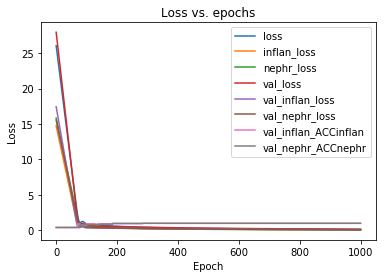

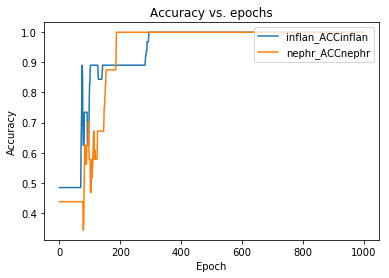

In [19]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflan_ACCinflan', 'nephr_ACCnephr')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [20]:
# Evaluate the model



***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [3]:
import numpy as np

#### Create Variable objects

In [14]:
# Create Variable objects of different type with tf.Variable
strings = tf.Variable(initial_value = ["Hello Stranger"],dtype=tf.string)
floats = tf.Variable(initial_value = [3.14123, 2.71828], dtype=tf.float64)
ints = tf.Variable(initial_value=[1, 2, 3], dtype=tf.int32,shape=(3))
complexs = tf.Variable(initial_value=[25.9 - 7.39j, 1.23 - 491j],dtype=tf.complex128)


In [11]:
# Initialise a Variable value
tf.Variable(initial_value = tf.constant(7.2, shape=(3,3) , dtype = tf.float64))

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float64, numpy=
array([[7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2],
       [7.2, 7.2, 7.2]])>

#### Use and modify Variable values

In [23]:
# Use the value of a Variable
v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w) , w)

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(1.0, shape=(), dtype=float32)


In [24]:
# Increment the value of a Variable

v.assign_add(1)

## If we use below operation the type will change to tensor,so becareful
#v = v + 1
#v

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [25]:
# Decrement the value of a Variable

v.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [27]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [28]:
# Obtain the value as a numpy array



In [29]:
# Create a Tensor of type float32



In [30]:
# Create coefficients

coeffs = np.arange(16)

In [31]:
# Initialise shapes



In [32]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)

NameError: name 'shape1' is not defined

#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor



In [ ]:
# Display the rank

print("rank: ", rank)

In [ ]:
# Reshape a Tensor



In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

In [ ]:
# Create ones, zeros, identity and constant Tensors



In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)

In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors



In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)

In [ ]:
# Expanding the rank of Tensors



In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Squeezing redundant dimensions



In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Slicing a Tensor



#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication



In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)

In [ ]:
# Elementwise operations



In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)

In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor



In [ ]:
# Power of a Tensor



In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powab)

#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution



In [ ]:
# Create a Tensor with samples from a Uniform distribution



In [ ]:
# Create a Tensor with samples from a Poisson distribution



In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [ ]:
# Load the VGG19 model



In [ ]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

#### Build a model to access the layer outputs

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
# Build a model that returns the layer outputs



In [ ]:
# Plot the model



In [ ]:
# Test the model on a random input



#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

In [ ]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('data/cool_cat.jpg'))

#### Visualise network features from the input image

In [ ]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Extract the features



In [ ]:
# Visualise the input channels



In [ ]:
# Visualise some features in the first hidden layer



In [ ]:
# Build a model to extract features by layer name



In [ ]:
# Visualise some features from the extracted layer output



In [ ]:
# Extract features from a layer deeper in the network



In [ ]:
# Visualise some features from the extracted layer output



***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [ ]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [ ]:
# Display the model summary

model.summary()

#### Examine the weight matrix variation over training

In [ ]:
# Retrieve the weights and biases



In [ ]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing



In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Build the model



In [ ]:
# Count the trainable and non trainable variables after the freezing



In [ ]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Retrieve weights and biases



In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation



#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Freeze the second layer



In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation

